## PHYS-467 Machine Learning for Physicists. Exercise session 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle, os
from urllib.request import urlopen 

from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

np.random.seed(42)

# Exercise 1: Linear Regression (clarifications)

In this first exercise, we'll clarify the link between Gradient Descent, the pseudo-inverse and regularization for Ridge regression

**Question 1.a)** Generate a random $n\times{d}$ data matrix $X$ where $n=5$ and $d=10$. Generate an $n-$ dimensional _random_ label vector $y$.

In [3]:
n = 5
d = 10
X = np.random.randn(n, d)
y = np.random.randn(n)

**Question 1.b)** Use sklearn's LinearRegression to solve the OLS problem on the previously generated data. Use the option fit_intercept=False.

In [10]:
linear_regression = LinearRegression(fit_intercept=False)
lr = linear_regression.fit(X, y)

**Question 1.c)** Recall that the OLS solution is given by $w = (X^TX)^{-1}X^Ty$. Note that when $n<d$, the matrix $X^TX$ is not invertible and we should resort to the pseudoinverse of $X$. In this case the solution reads $w = X^T(XX^T)^{-1}y$. Write a function that returns the solution calculated in this way and compare the so-obtained coefficients with those obtained by sklearn. What can you conclude?

In [11]:
def linear_regression_pinv(X, y):
    return X.T @ np.linalg.inv(X @ X.T) @ y

lr_pinv = linear_regression_pinv(X, y)

In [12]:

print(lr_pinv)
print(l_r.coef_)

[ 0.05140553  0.46808963 -0.13261446  0.2732456  -0.03921823 -0.36139712
  0.16613153 -0.00734326  0.24185646 -0.37594695]
[ 0.05140553  0.46808963 -0.13261446  0.2732456  -0.03921823 -0.36139712
  0.16613153 -0.00734326  0.24185646 -0.37594695]


In [14]:
np.allclose(l_r.coef_ , linear_regression_(X, y))

True

**Question 1.c)** Another way to make the matrix invertible is to do Ridge Regression. Implement a function returning the regularized solution and compare with the solution obtained by sklearn's Ridge, use $\lambda=1$ for both cases.

In [19]:
def linear_regression_ridge(X, y, reg=1.0):
    return np.linalg.inv(X.T @ X + reg * np.eye(X.shape[1])) @ X.T @ y

lr_reg = linear_regression_ridge(X, y, reg=1.0)

In [20]:
ridge = Ridge(alpha=1.0, fit_intercept=False)
ridge.fit(X, y)
print(ridge.coef_)
print(lr_reg)

[ 0.01740638  0.34219209 -0.07836338  0.21009139 -0.04502128 -0.28256825
  0.1541607  -0.00409031  0.14698769 -0.27264937]
[ 0.01740638  0.34219209 -0.07836338  0.21009139 -0.04502128 -0.28256825
  0.1541607  -0.00409031  0.14698769 -0.27264937]


In [21]:
np.allclose(ridge.coef_, lr_reg)

True

**Question 1.d)** Use a small regularization parameter, say $\lambda = 0.001$ and compare the output of Ridge regression with the pseudo-inverse. What do you notice ?

In [27]:
lr_reg_small = linear_regression_ridge(X, y, reg=0.00001)
print(lr_reg_small)
print(lr_pinv)

[ 0.05140496  0.46808783 -0.13261363  0.27324474 -0.0392184  -0.36139607
  0.16613147 -0.0073432   0.24185502 -0.37594551]
[ 0.05140553  0.46808963 -0.13261446  0.2732456  -0.03921823 -0.36139712
  0.16613153 -0.00734326  0.24185646 -0.37594695]


In [28]:
np.isclose(lr_reg_small, lr_pinv)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

**Question 1.e)** Compute the square error on the training data, obtained by using the pseudoinverse coefficient and the error obtained with the regularised coefficient (with $\lambda = 0.1$). Which one do you expect to be smaller?

In [30]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

lr_reg = linear_regression_ridge(X, y, reg=0.1)

print(mse(y, X@lr_reg))
print(mse(y, X@lr_pinv))

0.00045877940311018356
7.457200744667377e-32


**Question 1.f)** Consider the OLS problem and implement a function performing one step of gradient descent w.r.t. the parameters. Implement a second function calling the first function for M iterations and finally returning the optimal parameters.

In [36]:
def step_gd(X, y, w, step_size):
    grad = X.T @ (X @ w - y)
    w = w - step_size * grad
    return w

def train(X, y, w, step_size=0.1, M=100):
    for i in range(M):
        w = step_gd(X, y, w,step_size)
    return w

**Question 1.g)** Compute 1) $w_a$ the parameters obtained by initializing gradient descent with a vector of zeroes, and $w_b$ the parameters obtained by initializing gradient descent with a vector of ones. Compare both $w_a$ and $w_b$ with the solution obtained by the pseudo-inverse. What do you notice ?

In [41]:
w_a = np.zeros(d)
w_b = np.ones(d)

w_a = train(X, y, w_a, step_size=0.01, M=5000)
w_b = train(X, y, w_b, step_size=0.01, M=5000)


In [42]:
print(w_a)
print(w_b)
print(lr_pinv)

[ 0.05140553  0.46808963 -0.13261446  0.2732456  -0.03921823 -0.36139712
  0.16613153 -0.00734326  0.24185646 -0.37594695]
[-0.20032023  1.31127431  0.87438817 -0.28143709  0.07610369  0.21457974
  0.37226861  0.5765021   0.68453299 -0.32013639]
[ 0.05140553  0.46808963 -0.13261446  0.2732456  -0.03921823 -0.36139712
  0.16613153 -0.00734326  0.24185646 -0.37594695]


**Question 1.h)** Generate a random data $n\times{d}$ matrix $X$ where $n=10$ and $d=5$. Generate an $n-$dimensional label vector $y$.

In [43]:
n = 10
d= 5

X = np.random.randn(n, d)
y = np.random.randn(n)

**Question 1.i)** Use sklearn's LinearRegression to solve the OLS problem on the previously generated data. Use the option fit_intercept=False.

In [44]:
lr = LinearRegression(fit_intercept=False)
lr_sk = lr.fit(X, y)


**Question 1.l)** Write a function returning the standard OLS solution and compare it with the sklearn's solution

In [45]:
def linear_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [46]:
print(linear_regression(X, y))
print(lr_sk.coef_)

[-0.45550697  0.02941968 -0.74804867  0.46674212  0.14780507]
[-0.45550697  0.02941968 -0.74804867  0.46674212  0.14780507]


**Question 1.m)** Compute the training error obtained by using the OLS coefficient and the error obtained with the regularised coefficient (with $\lambda = 0.1$). Which one do you expect to be smaller?

In [48]:
ridge = Ridge(alpha=0.1, fit_intercept=False)
lr_rdg_sk = ridge.fit(X, y)
print(mse(y, X@linear_regression(X, y)))
print(mse(y, lr_rdg_sk.predict(X)))

0.8943987076144154
0.8946687197860174


**Question 1.n)** Use the GD function implemented before and compare the solution it finds with the one found by sklearn's LinearRegression.

In [50]:
w_init = np.zeros(d)
w_gd = train(X, y, w_init, step_size=0.01, M=5000)

print(w_gd)
print(lr_sk.coef_)

[-0.45550697  0.02941968 -0.74804867  0.46674212  0.14780507]
[-0.45550697  0.02941968 -0.74804867  0.46674212  0.14780507]


# Exercise 2 : (Stochastic) Gradient Descent with Logistic regression

**Question 2.a)** Implement the sigmoid function $\sigma(x)$

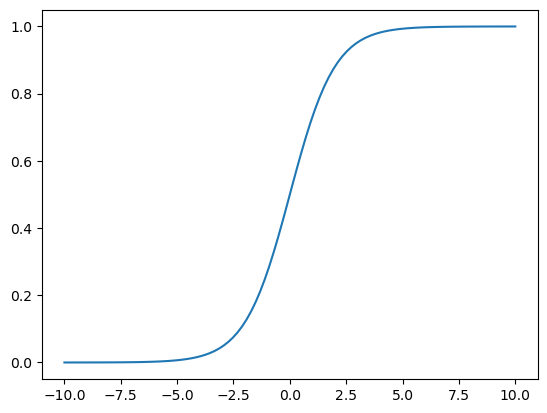

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))

**Question 2.b)** Generate an $n\times{d}$ random data matrix with dimension $d = 2$. Generate a random vector of optimal parameters $w_{opt}$. Generate the labels as $y = \pm 1$ from the distribution $p(y = 1 | x) = 1 - p(y = -1 | x) = \sigma(w_{opt}^Tx)$. 

In [63]:
d = 2
n = 100

w_opt = np.random.randn(d)
X = np.random.randn(n, d)
y = 2 * np.random.binomial(1, sigmoid(X@w_opt)) -1

**Question 2.d)** Implement a function performing one step gradient descent for logistic regression. Recall that with $y = \pm 1$,  the logistic loss is $\mathcal L = - \sum_i \log \sigma(y_i \times w^T x_i)$. Implement a second function enabling multiple iterations of gradient descent. This function should return the parameters calculated at each iteration.

In [69]:
def step_gd_logistic(X, y, w, step_size):
    grad = X.T @ (sigmoid(X @ w) - y)
    w = w - step_size * X.T @ (sigmoid(X @ w) - y)
    return w

def train_gd_logistic(X, y, w, step_size=0.01, n_iter=100):
    ws= []
    for i in range(n_iter):
        w = step_gd_logistic(X, y, w, step_size)
        ws.append(w)
    return ws

**Question 2.e)** Implement stochastic gradient descent using the gradient step function used in the previous question. Hint: you should apply the gradient step function only on a random subset of the data at each iteration.

In [70]:
def train_stochastic_logistic(X, y, w, step_size=0.01, batch_size=10, n_iter=100):
    ws = []
    for i in range(n_iter):
        indices = np.random.choice(X.shape[0], batch_size)
        X_batch = X[indices]
        y_batch = y[indices]
        w = step_gd_logistic(X_batch, y_batch, w, step_size)
        ws.append(w)
    return ws

**Question 2.f)** Run GD and SGD with a small learning rate $\eta$ ($10^{-2}$ should work fine). Plot the cosine $\frac{w_t \cdot w_{\star}}{\vert{w_t}\vert\vert{w_{\star}\vert}}$ as a function of the number of iterations $t$ for Gradient Descent and Stochastic Gradient Descent. 

In [71]:
ws_gd = train_gd_logistic(X, y, np.zeros(d), step_size=0.01, n_iter=1000)
ws_sgd = train_stochastic_logistic(X, y, np.zeros(d), step_size=0.01, batch_size=10, n_iter=1000)


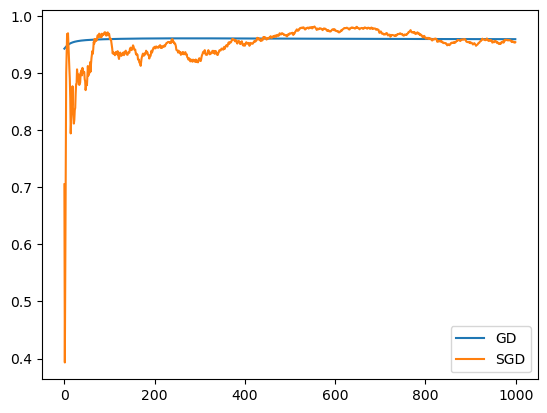

In [72]:
ys_gd = ws_gd @ w_opt / (np.linalg.norm(ws_gd, axis=1) * np.linalg.norm(w_opt))
ys_sgd = ws_sgd @ w_opt / (np.linalg.norm(ws_sgd, axis=1) * np.linalg.norm(w_opt))

plt.plot(ys_gd, label='GD')
plt.plot(ys_sgd, label='SGD')
plt.legend()
plt.show()

**Question 2.g)** Use sklearn's LogisticRegression with fit_intercept=False and compare its accuracy with that obtained by gd and the optimal parameters.

In [79]:
logreg = LogisticRegression(fit_intercept=False, C=1e15, solver='lbfgs')
y_sk = y.copy()
y_sk[y_sk == -1] = 0
logreg_sk = logreg.fit(X, y)


In [81]:
def zero_one_loss(y, y_hat):
    return np.mean(y != y_hat)

print(zero_one_loss(y, X@w_opt))
print(zero_one_loss(y, X@ws_gd[-1]))
print(zero_one_loss(y_sk, logreg_sk.predict(X)))

1.0
1.0
0.62


**Question 2.h** In this question we look at the role of the learning rate in the convergence of gradient descent. Run GD with a large learning rate (say $\eta$ = 10.0), and observe that GD does not converge.

In [83]:
ws_gd_large_lr = train_gd_logistic(X, y, np.zeros(d), step_size=10, n_iter=1000)

/tmp/ipykernel_3397504/2280458658.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [89]:
ws_gd_large_lr = train_gd_logistic(X, y, np.zeros(d), step_size=0.01, n_iter=1000)


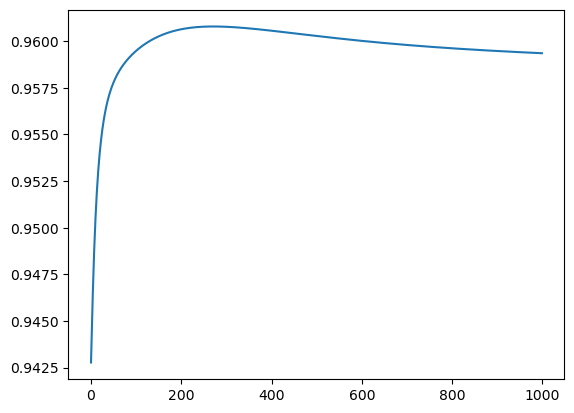

In [90]:
plt.plot(ws_gd_large_lr @ w_opt / (np.linalg.norm(ws_gd_large_lr, axis=1) * np.linalg.norm(w_opt)), label='GD large lr')

# Exercise 3: LASSO

**Question 3.a)** Generate a $n\times{d}$ matrix with entries drawn from a Gaussian with zero mean and unit variance. Choose $n=300$ and $d=10$.

In [91]:
n = 300
d = 10
X = np.random.randn(n, d)


**Question 3.b)** Given the vector $w_{opt}$ provided below, print it and use it to generate the training and testing labels. Corrupt the labels with zero-mean unit-variance Gaussian noise

In [95]:
w_opt = np.random.choice([0,1,-1], d ,p=[0.7,0.15,0.15])
print(w_opt)

[0 0 0 1 0 0 1 0 1 1]


In [96]:
y = X @ w_opt + np.random.randn(n)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 10), (60, 10), (240,), (60,))

**Question 3.c)** Perform linear regression on the training data and print: a) the so-found coefficients and the train error

In [103]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)
print(lr.coef_)
print(mse(y_train, lr.predict(X_train)))

[-0.02546363  0.04954802 -0.10246326  0.9733557  -0.02258245  0.07151539
  0.97036865 -0.09969167  0.85301929  0.97572269]
1.075709392237557


**Question 3.d)** Fit sklearn's LASSO on the training data and print: a) the so-found coefficients and the train error. Fix the regularization to 0.1. Look at the coefficients, what do you notice?

In [104]:
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(X_train, y_train)
print(lasso.coef_)
print(mse(y_train, lasso.predict(X_train)))

[-0.          0.         -0.02019879  0.84206818 -0.          0.
  0.88132796 -0.          0.75173324  0.87962949]
1.1409348800974435


**Question 3.e)** Use cross validation to find the optimal value of the regularization strength in Lasso. Plot the different coefficients as a function of $\lambda$ 

In [106]:
def cross_validation(X, y, alpha, n_folds=5):
    n = X.shape[0]
    indices = np.random.permutation(n)
    X = X[indices]
    y = y[indices]
    X_folds = np.array_split(X, n_folds)
    y_folds = np.array_split(y, n_folds)
    scores = []
    for k in range(n_folds):
        X_train = np.concatenate(X_folds[:k] + X_folds[k+1:])
        y_train = np.concatenate(y_folds[:k] + y_folds[k+1:])
        X_test = X_folds[k]
        y_test = y_folds[k]
        lasso = Lasso(alpha=alpha, fit_intercept=False)
        lasso.fit(X_train, y_train)
        scores.append(mse(y_test, lasso.predict(X_test)))
    return np.mean(scores)

alphas = np.logspace(-4, 1, 100)
scores = [cross_validation(X_train, y_train, alpha) for alpha in alphas]


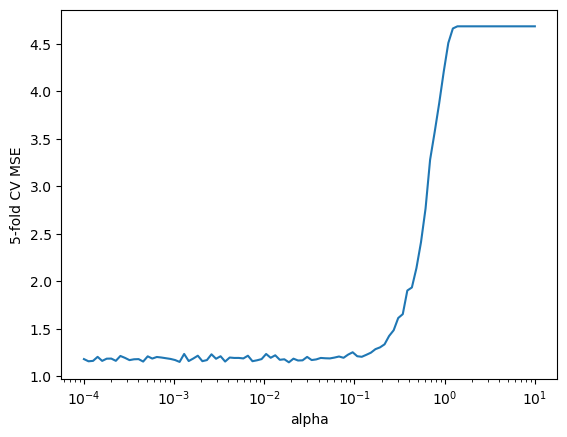

In [110]:
plt.plot(alphas, scores)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('5-fold CV MSE')
plt.show()


# Exercise 4: Ridge Classification, Logistic Regression

In this exercise we first consider a synthetic dataset to compare Ridge and Logistic regression for classification

**Question 4.a)** Use the sklearn function make_classification to generate 1000 data samples in 2 dimension. Use the following arguments: n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=12. Then use train_test_split with the following arguments X, y, test_size=0.2, random_state=42, to generate training and test splits.

In [115]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0, 
    n_clusters_per_class=1,
    random_state=12)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X_train

array([[ 0.62283386,  1.42069492],
       [-1.12884576, -1.66762701],
       [-0.86666977, -0.8438652 ],
       ...,
       [-0.3215874 ,  0.48651561],
       [-2.05974804, -1.14152851],
       [-0.92154467, -1.29027713]])

**Question 4.b)** Make a scatter plot of the training data. Color each point according to its cluster assignment. _Hint_ : To change the color as a function of the label, use the option `c=y` in `plt.scatter`.

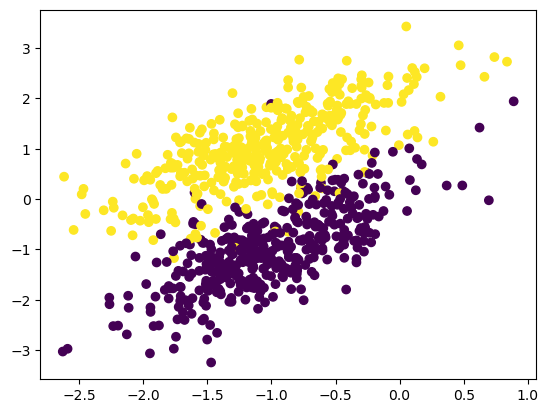

In [117]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

**Question 4.c)** Train a ridge classifier and a logistic regression using sklearn. Compare the results in terms of accuracy.

In [122]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(accuracy_score(y_train, ridge.predict(X_train)))
print(accuracy_score(y_train, logreg.predict(X_train)))

0.96
0.95875


**Question 4.d)** Plot the decision boundaries of the two models 

In [120]:
def plot_decision_boundaries(X_test,y_test,ridge_classifier, logistic_regression, accuracy_ridge,accuracy_logistic):
    """
    arguments : 
        - X_test, y_test : test data
        - ridge_classifier : instance of the class RidgeClassifier
        - logistic_regression : instance of the class LogisticRegression
        - accuracy_ridge : accuracy of the ridge classifier
        - accuracy_logistic : accuracy of the logistic regression
    """
    # Plot the decision boundary for Ridge Classifier
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
    plt.title(f"Ridge Classifier\nAccuracy: {accuracy_ridge:.2f}")
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = ridge_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    
    # Plot the decision boundary for Logistic Regression
    plt.subplot(1, 2, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
    plt.title(f"Logistic Regression\nAccuracy: {accuracy_logistic:.2f}")
    ax = plt.gca()
    Z = logistic_regression.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    
    plt.show()

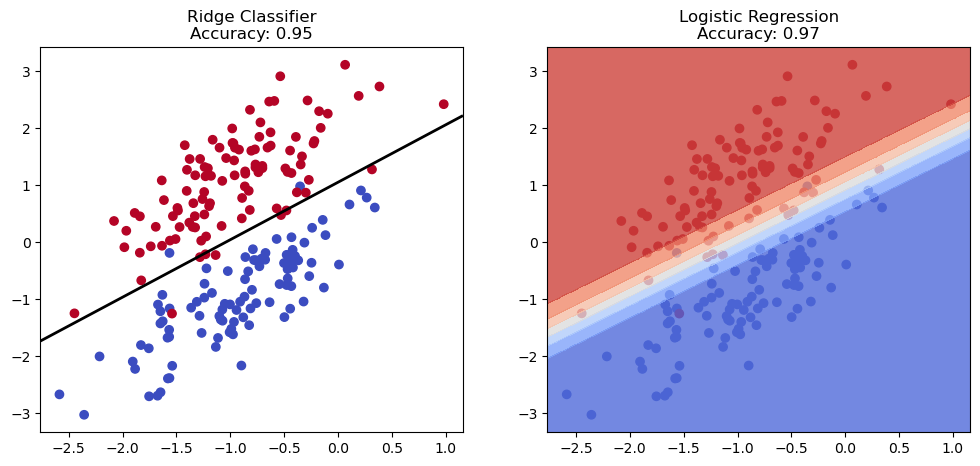

In [123]:
plot_decision_boundaries(X_test, y_test, ridge, logreg, accuracy_score(y_test, ridge.predict(X_test)), accuracy_score(y_test, logreg.predict(X_test)))

**Question 4.e)** Implement ridge classification from scratch. Implement two functions: one should return the weights and biases, the other should return the classification results given the inputs and the previously obtained coefficients. Add the option to include a regularization parameter.

In [127]:
def ridge_classification(X, y, alpha):
    X_aug = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
    coeff =  np.linalg.inv(X_aug.T @ X_aug + alpha * np.eye(X_aug.shape[1])) @ X_aug.T @ y
    return coeff[:-1], coeff[-1]

def ridge_predict(X, coeff, intercept):
    return np.sign(X @ coeff + intercept)
    

**Question 4.f)** Plot the decision boundary and compare it with that obtained via sklearn. Use alpha = 1.

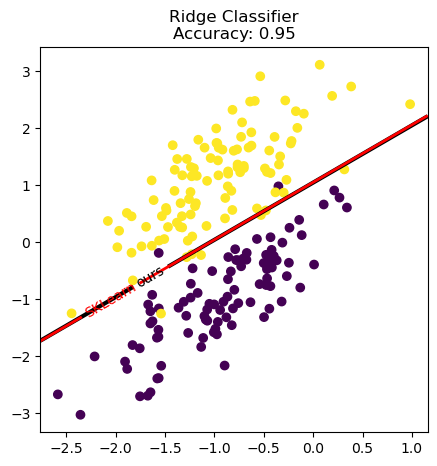

In [158]:
y_train_ridge = y_train * 2 - 1
coeff, intercept = ridge_classification(X_train, y_train_ridge, alpha=1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
y_test_ridge = y_test * 2 - 1
ax.set_title('Ridge Classifier\nAccuracy: {:.2f}'.format(accuracy_score(y_test_ridge, ridge_predict(X_test, coeff, intercept))))

xlims = ax.get_xlim()
ylims = ax.get_ylim()

xs = np.linspace(xlims[0], xlims[1], 100)
ys = np.linspace(ylims[0], ylims[1], 100)
xx, yy = np.meshgrid(xs, ys)
Z = (np.c_[xx.ravel(), yy.ravel()]) @ coeff + intercept
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z, levels=[0], linewidths=3, colors='k')
ax.clabel(cs, fmt='ours')

Z = ridge.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='r')
ax.clabel(cs, fmt='SKLearn')

plt.show()

# Exercise 5: Classification on the Ising model 

We will now apply regression to the Ising model to predict the phase of the system. 

In [2]:
# Ising model parameters

L=40 # linear system size
J=-1.0 # Ising interaction
#T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

**Question 5.a)**

1) Load the data using the provided function `load_data`, then split the data in three categories : the first **70000** samples are configurations in the **ordered** phase, the next **30000** samples are in the **critical** phase and the last **60000** samples are in the **disordered** phase.

2) Merge the ordered and disordered samples together, use half of them for a training set and the rest for a validation set.

In [3]:
def load_data():
    """
    Loads the data of the Ising model. The labels correspond to ordered (1) and disordered states (0).
    """
    # url to data
    url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/';
    ######### LOAD DATA
    # The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
    data_file_name = "Ising2DFM_reSample_L40_T=All.pkl" 
    # The labels are obtained from the following file:
    label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"
    #DATA
    data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
    data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
    data=data.astype('int')
    data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

    #LABELS (convention is 1 for ordered states and 0 for disordered states)
    labels = pickle.load(urlopen(url_main + label_file_name)) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
    return data, labels


In [6]:
data, labels = load_data()
print(len(data))

160000


In [7]:
num_classes=2
test_ratio = 0.5

# divide data into ordered, critical and disordered
X_ordered = data[:70000,:]
Y_ordered = labels[:70000]

X_critical = data[70000:100000,:]
Y_critical = labels[70000:100000]

X_disordered = data[100000:,:]
Y_disordered = labels[100000:]

# define training and test data sets
X = np.concatenate((X_ordered, X_disordered))
Y = np.concatenate((Y_ordered, Y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=test_ratio)

# full data set
X=np.concatenate((X_critical,X))
Y=np.concatenate((Y_critical,Y))

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_critical.shape[0], 'critical samples')
print(X_test.shape[0], 'test samples')

X_train shape: (65000, 1600)
Y_train shape: (65000,)

65000 train samples
30000 critical samples
65000 test samples


**Question 5.b)** Plot one instance of each class

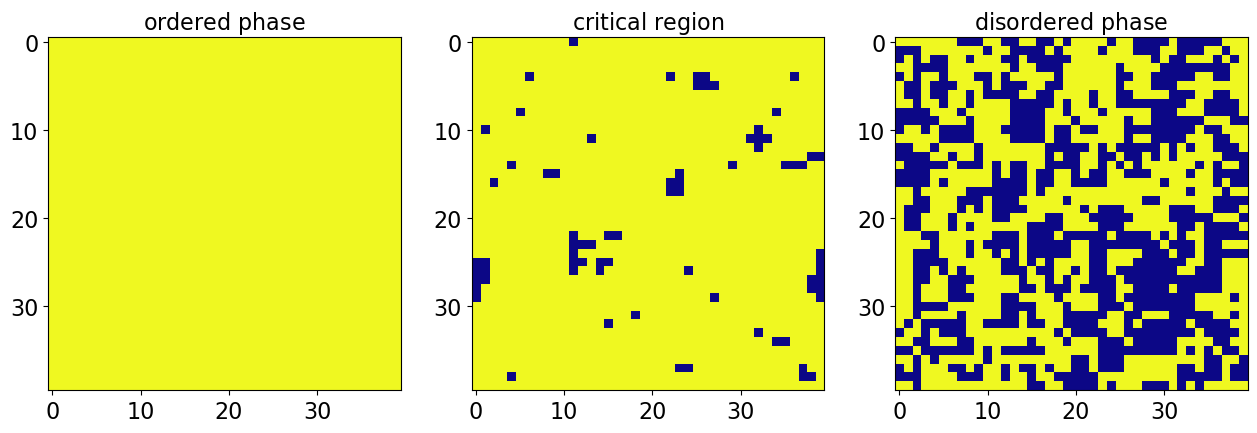

In [8]:
# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3)

axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow(X_critical[1000].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=16)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow(X_disordered[50000].reshape(L,L),**cmap_args)
axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=16)
axarr[2].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)

plt.show()

**Question 5.c)** Train a Ridge and Logistic regression model using different regularization and evaluate the performance on the validation set and the samples in the critical phase. What do you notice ?
_Note_ : Training the models might take some time 

In [ ]:
lambdas = np.logspace(-4, 5, 10)

train_accuracy_log = np.zeros(lambdas.shape)
test_accuracy_log = np.zeros(lambdas.shape)
critical_accuracy_log = np.zeros(lambdas.shape)
train_accuracy_ridge = np.zeros(lambdas.shape)
test_accuracy_ridge = np.zeros(lambdas.shape)
critical_accuracy_ridge = np.zeros(lambdas.shape)

for i, l in tqdm(enumerate(lambdas)):
    logreg = LogisticRegression(C=1.0/l)
    ridge = RidgeClassifier(alpha=l)

    logreg.fit(X_train, Y_train)
    ridge.fit(X_train, Y_train)

    train_accuracy_log[i]=logreg.score(X_train,Y_train)
    test_accuracy_log[i]=logreg.score(X_test,Y_test)
    critical_accuracy_log[i]=logreg.score(X_critical,Y_critical)

    train_accuracy_ridge[i]=ridge.score(X_train,Y_train)
    test_accuracy_ridge[i]=ridge.score(X_test,Y_test)
    critical_accuracy_ridge[i]=ridge.score(X_critical,Y_critical)